In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from optbinning import BinningProcess

# set column width
pd.set_option('display.max_colwidth', 100)

# set plot style
sns.set_style('whitegrid')

# set palette
sns.set_palette('Set1')

- Bảng POS_CASH_BALANCE này thể hiện thông tin giao dịch: các lịch sử giao dịch và hành vi mua sắm qua thẻ tín dụng của người tiêu dùng tại Home Credit.


- SK_ID_PREV: 1 khách hàng có thể có 0,1 hoặc nhiều hơn 1 khoản nợ
- MONTHS_BALANCE: tính bằng tháng kể từ khoản vay gần nhất trước đấy
- CNT_INSTALMENT: Thời hạn của tín dụng trước
- CNT_INSTALMENT_FUTURE: phần trả góp còn thiếu từ những khoản nợ trước
- NAME_CONTRACT_STATUS: tình trạng hợp đồng
- SK_DPD: số ngày quá hạn trong kì của khoản tín dụng trước đó
- SK_DPD_DEF: số ngày quá hạn trong kì trước của tín dụng nhưng được công ti chấp nhận


In [2]:
def create_feature(df):
    new_features = {
        'CNT_INSTALMENT_DIFF': df['CNT_INSTALMENT'] - df['CNT_INSTALMENT_FUTURE'],
        'DPD': df['SK_DPD'] - df['SK_DPD_DEF'],
        'DPD_FLAG': df['SK_DPD'] > 0,
        'DPD_DEF_FLAG': df['SK_DPD_DEF'] > 0,
        'OVERDUE_RATIO': df['SK_DPD'] / df['CNT_INSTALMENT'],
        'OVERDUE_DEF_RATIO': df['SK_DPD_DEF'] / df['CNT_INSTALMENT'],
    }

    df = pd.concat([df, pd.DataFrame(new_features)], axis=1)
    return df

In [3]:
df = pd.read_csv('../raw-data/dseb63_POS_CASH_balance.csv')
df.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [5]:
df = create_feature(df)
print('After creating features: {}'.format(df.shape))

After creating features: (8543375, 14)


In [6]:
df.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO
0,1803195,-31,48.0,45.0,Active,0,0,185279,3.0,0,False,False,0.0,0.0
1,1803195,-17,48.0,31.0,Active,0,0,185279,17.0,0,False,False,0.0,0.0
2,1803195,-21,48.0,35.0,Active,0,0,185279,13.0,0,False,False,0.0,0.0
3,1803195,-8,48.0,21.0,Active,0,0,185279,27.0,0,False,False,0.0,0.0
4,1803195,-4,48.0,17.0,Active,0,0,185279,31.0,0,False,False,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
 8   CNT_INSTALMENT_DIFF    float64
 9   DPD                    int64  
 10  DPD_FLAG               bool   
 11  DPD_DEF_FLAG           bool   
 12  OVERDUE_RATIO          float64
 13  OVERDUE_DEF_RATIO      float64
dtypes: bool(2), float64(5), int64(6), object(1)
memory usage: 798.5+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
CNT_INSTALMENT_DIFF      21963
DPD                          0
DPD_FLAG                     0
DPD_DEF_FLAG                 0
OVERDUE_RATIO            21863
OVERDUE_DEF_RATIO        21863
dtype: int64

In [10]:
df.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO
count,8.543375e+06,8.543375e+06,8.521512e+06,8.521497e+06,8.543375e+06,8.543375e+06,8.543375e+06,8.521412e+06,8.543375e+06,8.521512e+06,8.521512e+06
mean,1.903489e+06,-3.494812e+01,1.703348e+01,1.046808e+01,1.190473e+01,5.835209e-01,1.535356e+05,6.565541e+00,1.132121e+01,1.579393e+00,8.105425e-02
std,5.359387e+05,2.605372e+01,1.200430e+01,1.114408e+01,1.340302e+02,3.042110e+01,8.871661e+04,5.875444e+00,1.305651e+02,2.059598e+01,4.701565e+00
min,1.000001e+06,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434475e+06,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,7.662200e+04,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.896878e+06,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00,1.533150e+05,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.369096e+06,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00,2.302930e+05,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.843499e+06,-1.000000e+00,8.400000e+01,8.400000e+01,4.231000e+03,3.373000e+03,3.075100e+05,7.200000e+01,4.231000e+03,3.804000e+03,7.455000e+02


In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns: ", num_cols)
print("Categorical columns: ", cat_cols)

Numerical columns:  ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR', 'CNT_INSTALMENT_DIFF', 'DPD', 'OVERDUE_RATIO', 'OVERDUE_DEF_RATIO']
Categorical columns:  ['NAME_CONTRACT_STATUS', 'DPD_FLAG', 'DPD_DEF_FLAG']


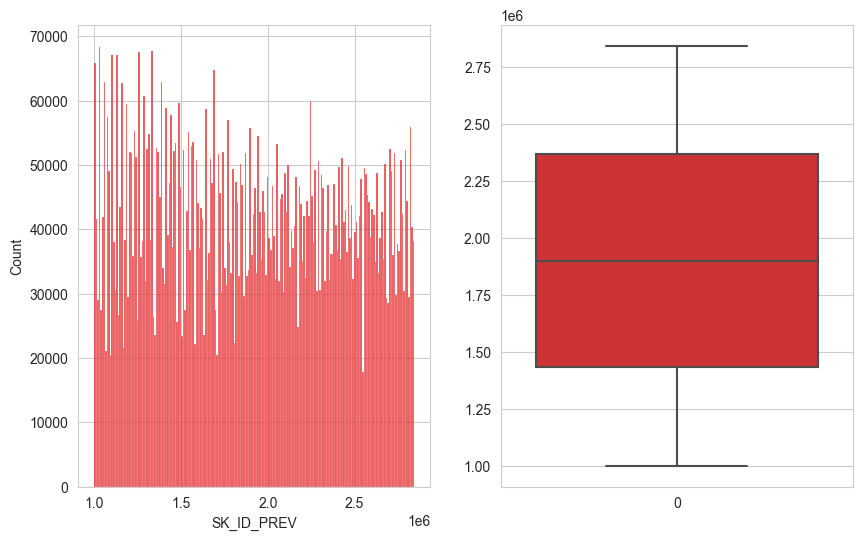

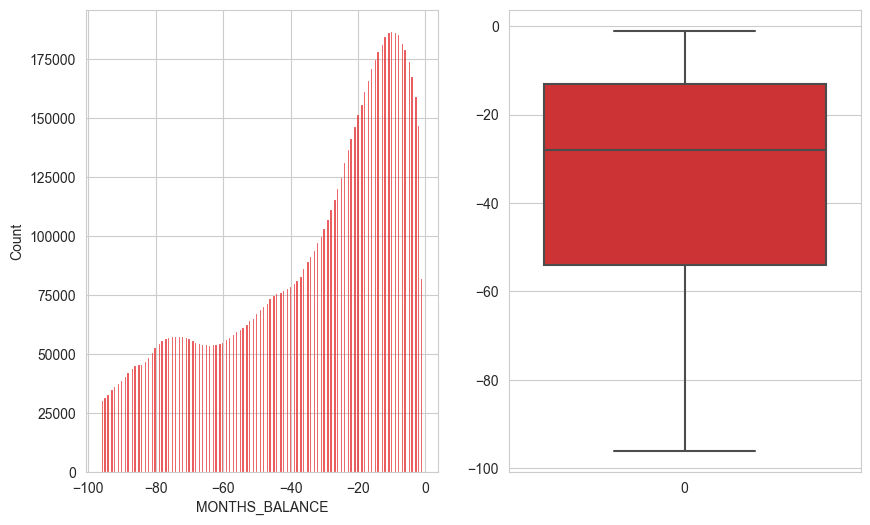

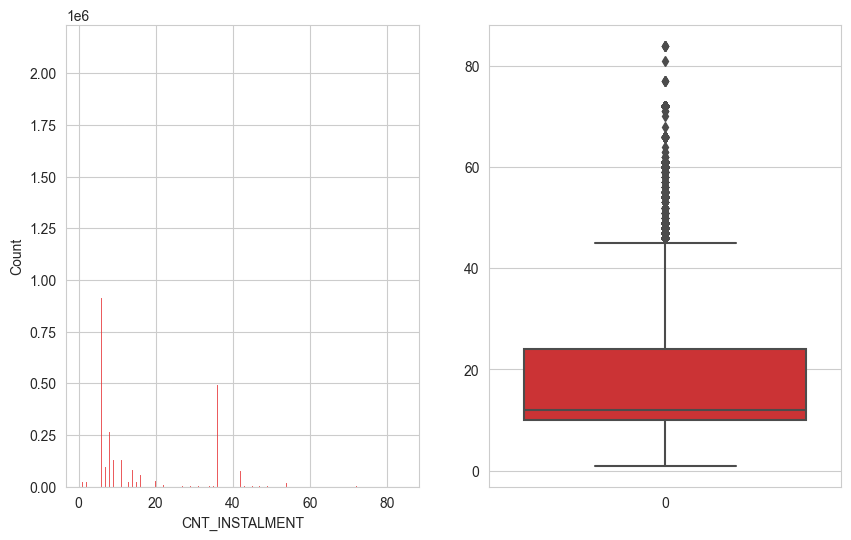

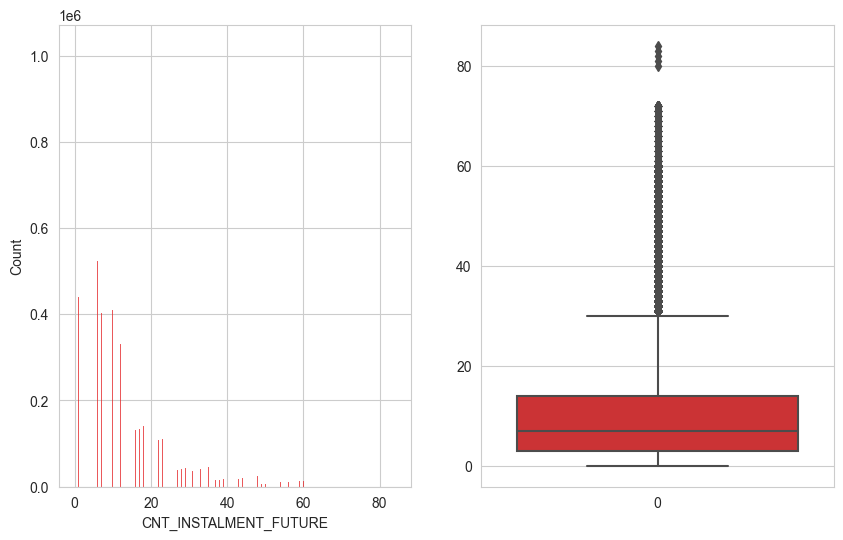

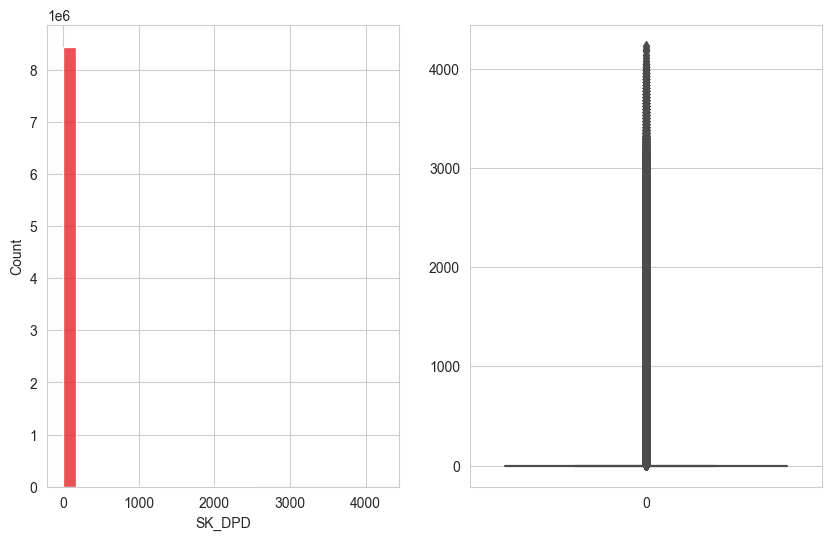

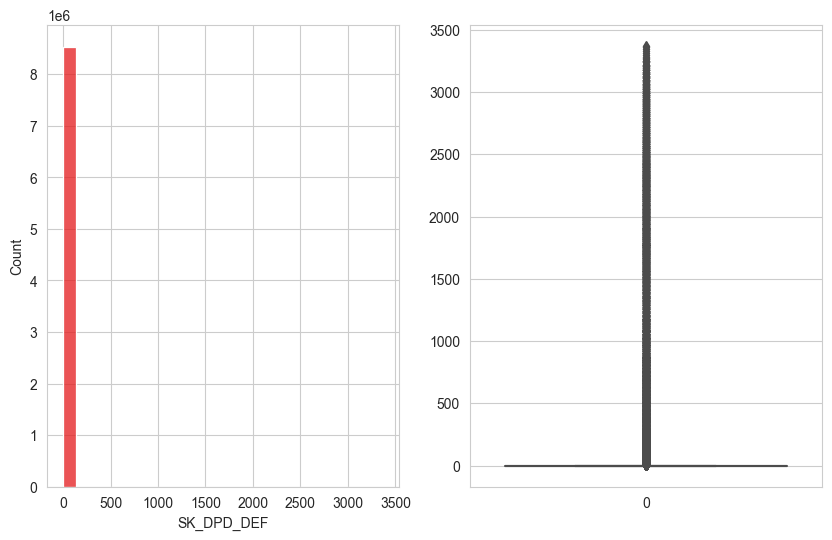

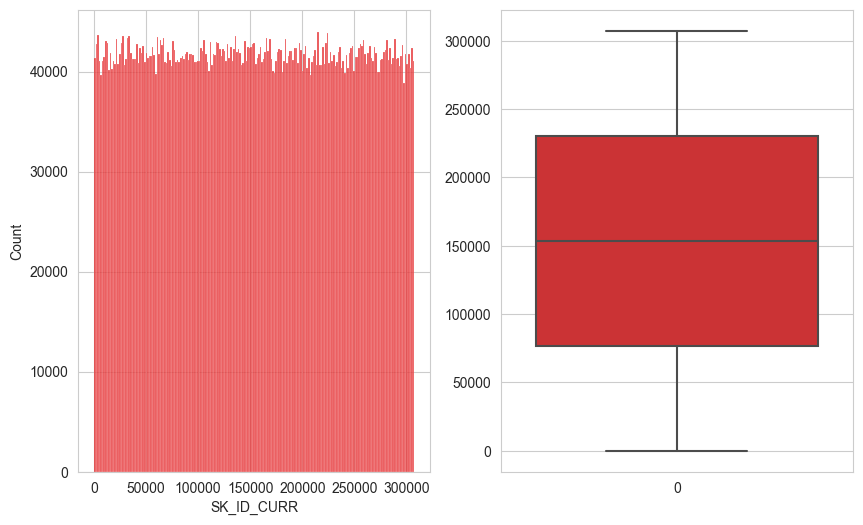

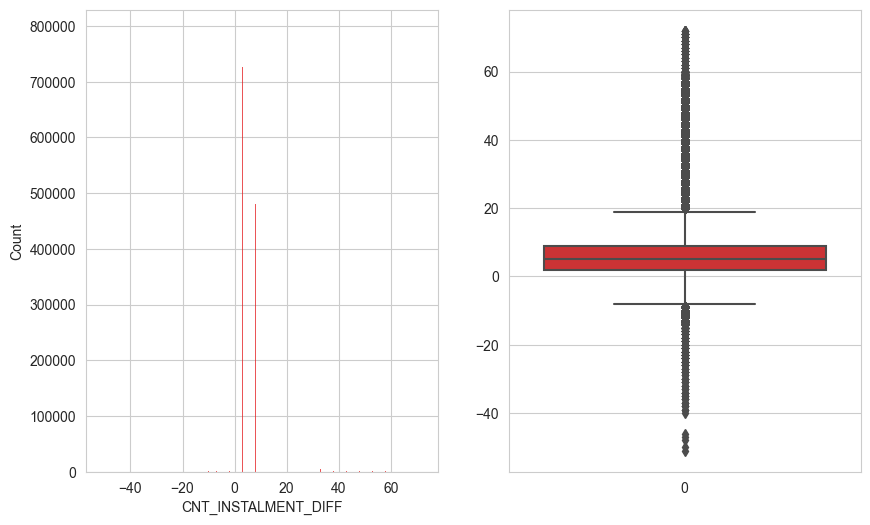

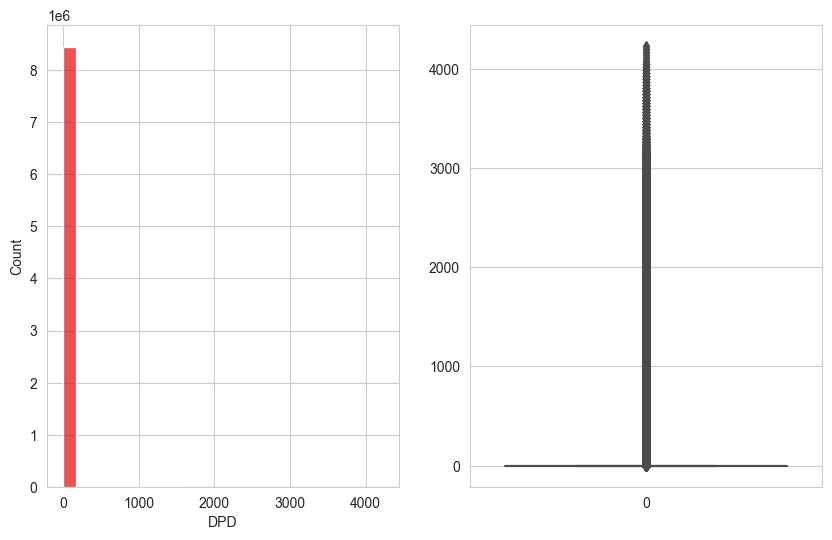

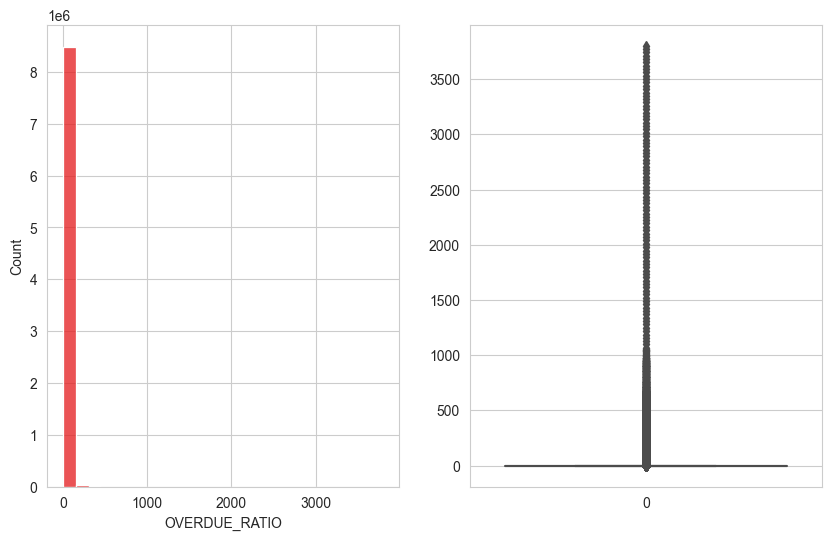

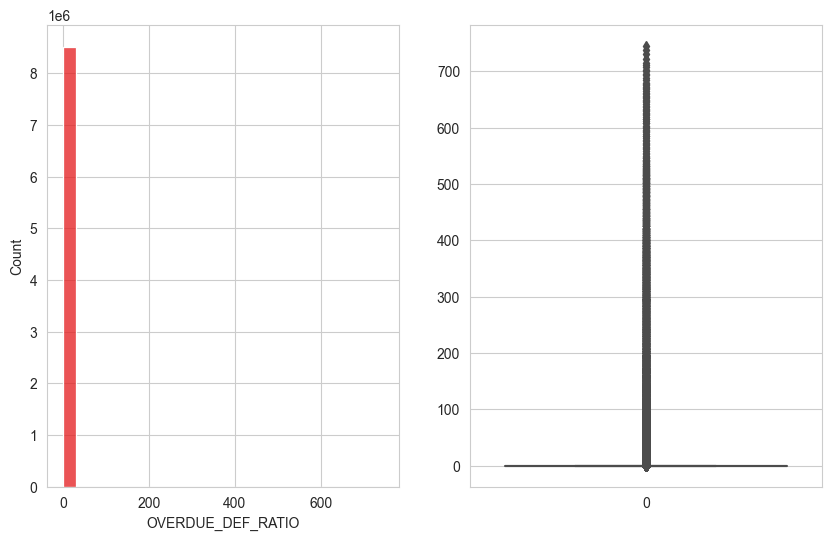

In [12]:
def plot_distribution(df, cols):
    for i in cols:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        sns.histplot(df[i])
        plt.subplot(1,2,2)
        sns.boxplot(df[i])
        plt.show()

plot_distribution(df, num_cols)

In [13]:
# get the most recent record of this dataset
df_last = df.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,False,False,0.0,0.0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,False,False,0.0,0.0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,False,False,0.0,0.0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,False,False,0.0,0.0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,8.0,0,False,False,0.0,0.0
800333,307508,1978855,-64,12.0,1.0,Active,0,0,11.0,0,False,False,0.0,0.0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,False,False,0.0,0.0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,False,False,0.0,0.0


#### Đếm số lần trả góp mới hoàn thành

In [14]:
df_last["COMPLETED_FLAG"] = df_last["NAME_CONTRACT_STATUS"] == "Completed" 
df_last["COMPLETED_COUNT"] = df_last.groupby(["SK_ID_CURR"])["COMPLETED_FLAG"].transform("sum")
df_last.drop(["COMPLETED_FLAG"], axis=1, inplace= True)
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,False,False,0.0,0.0,3
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,False,False,0.0,0.0,3
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,False,False,0.0,0.0,3
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,False,False,0.0,0.0,3
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,False,False,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,8.0,0,False,False,0.0,0.0,2
800333,307508,1978855,-64,12.0,1.0,Active,0,0,11.0,0,False,False,0.0,0.0,2
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,False,False,0.0,0.0,2
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,False,False,0.0,0.0,2


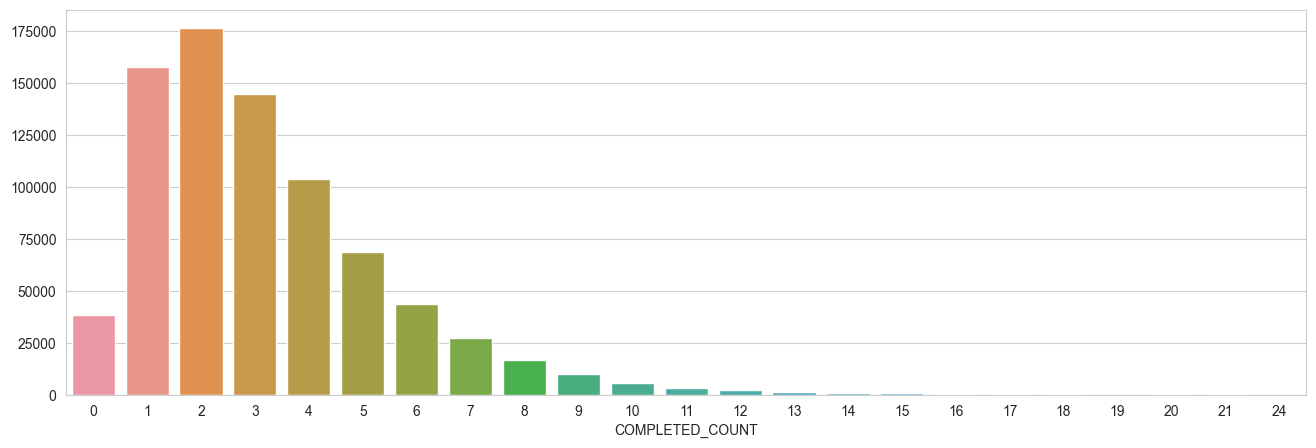

In [15]:
completed_count_SK = df_last.groupby(["COMPLETED_COUNT"]).size()
plt.figure(figsize=(16,5))
sns.barplot(x=completed_count_SK.index , y=completed_count_SK.values )
plt.show()

- Số lượng khách hàng có 2 lần hoàn thành việc trả nợ đúng hạn là cao nhất, theo sau đó là 1 lần và 3 lần.
- Có thể thấy, số lần trả nợ đúng hạn càng lớn thì khách hàng này sẽ có khả năng cao được xếp vào phân loại khách hàng có thể trả được nợ đúng hạn.

#### Đếm số lần trả góp quá hạn bởi ID

In [16]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

def DPD_flag(x):
    if x['DPD_FLAG'] == True :
        return 1
    else:
        return 0

def DPD_DEF_flag(x):
    if x['DPD_DEF_FLAG'] == True :
        return 1
    else:
        return 0

df_last["Overdue_flag"] = df_last.apply(overdue_flag, axis= 1)
df_last["DPD_FLAG"] = df_last.apply(DPD_flag, axis= 1)
df_last["DPD_DEF_FLAG"] = df_last.apply(DPD_DEF_flag, axis= 1)
df_last.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_flag
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,0,0,0.0,0.0,3,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0,0,0.0,0.0,3,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0,0,0.0,0.0,3,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0,0,0.0,0.0,3,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0,0,0.0,0.0,2,0


In [17]:
#Overdue_Count
df_last["Overdue_Count"] = df_last.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
df_last.drop(["Overdue_flag"], axis= 1, inplace= True)


# DPD_FLAG_COUNT
df_last["DPD_FLAG_count"] = df_last.groupby(["SK_ID_CURR"])["DPD_FLAG"].transform("sum")
df_last.drop(["DPD_FLAG"], axis= 1, inplace= True)


# DPD_DEF_FLAG_COUNT
df_last["DPD_DEF_FLAG_count"] = df_last.groupby(["SK_ID_CURR"])["DPD_DEF_FLAG"].transform("sum")
df_last.drop(["DPD_DEF_FLAG"], axis= 1, inplace= True)

df_last.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,0.0,0.0,3,0,0,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0.0,0.0,3,0,0,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0.0,0.0,3,0,0,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0.0,0.0,3,0,0,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0.0,0.0,2,0,0,0


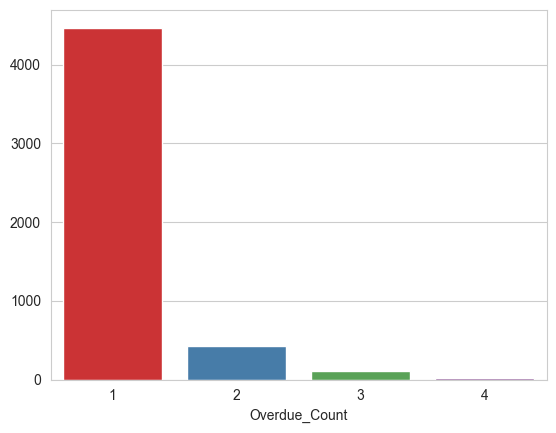

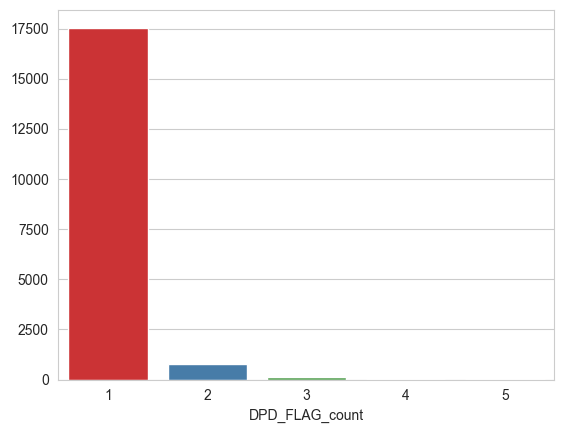

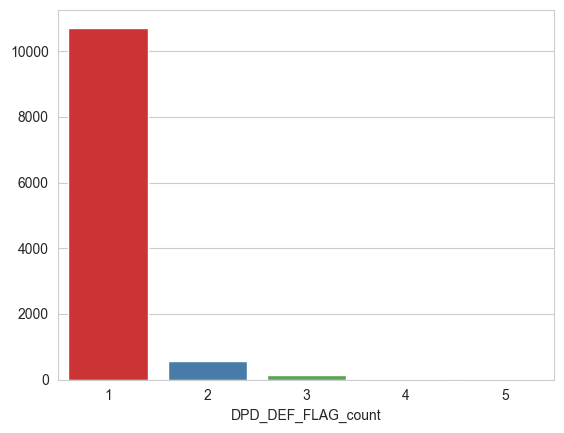

In [18]:
# Plot OVERDUE_COUNT
overdue_count_SK = df_last.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values )
plt.show()

# Plot DPD_FLAG_COUNT
dpd_count_SK = df_last.groupby(["DPD_FLAG_count"]).size()[1:]
sns.barplot(x= dpd_count_SK.index , y= dpd_count_SK.values )
plt.show()

# Plot DPD_DEF_FLAG_COUNT
dpd_def_count_SK = df_last.groupby(["DPD_DEF_FLAG_count"]).size()[1:]
sns.barplot(x= dpd_def_count_SK.index , y= dpd_def_count_SK.values )
plt.show()

In [19]:
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,0.0,0.0,3,0,0,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0.0,0.0,3,0,0,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0.0,0.0,3,0,0,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0.0,0.0,3,0,0,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0.0,0.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,8.0,0,0.0,0.0,2,0,0,0
800333,307508,1978855,-64,12.0,1.0,Active,0,0,11.0,0,0.0,0.0,2,0,0,0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,0.0,0.0,2,0,0,0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,0.0,0.0,2,0,0,0


In [20]:
# Load data bảng application_train để lấy biến TARGET
app_df = pd.read_csv('../raw-data/dseb63_application_train.csv')
app_df

# Merge pos_cash_df và app_df on SK_ID_CURR
df_last = df_last.merge(app_df[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,0.0,0.0,3,0,0,0,0.0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0.0,0.0,3,0,0,0,0.0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0.0,0.0,3,0,0,0,0.0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0.0,0.0,3,0,0,0,0.0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0.0,0.0,2,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,8.0,0,0.0,0.0,2,0,0,0,NaN
800333,307508,1978855,-64,12.0,1.0,Active,0,0,11.0,0,0.0,0.0,2,0,0,0,NaN
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,0.0,0.0,2,0,0,0,0.0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,0.0,0.0,2,0,0,0,0.0


In [21]:
# Drop các bản ghi có TARGET = NaN
df_last.dropna(subset=['TARGET'], inplace=True)
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.0,12.0,Active,0,0,0.0,0,0.0,0.0,3,0,0,0,0.0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0.0,0.0,3,0,0,0,0.0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0.0,0.0,3,0,0,0,0.0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0.0,0.0,3,0,0,0,0.0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0.0,0.0,2,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800328,307506,2196293,-2,12.0,0.0,Completed,0,0,12.0,0,0.0,0.0,4,0,0,0,0.0
800329,307506,2693485,-14,12.0,0.0,Completed,0,0,12.0,0,0.0,0.0,4,0,0,0,0.0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,0.0,0.0,2,0,0,0,0.0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,0.0,0.0,2,0,0,0,0.0


In [22]:
df_last['TARGET'].value_counts()

TARGET
0.0    593001
1.0     47183
Name: count, dtype: int64

In [26]:
cols_to_plot = df_last[num_cols].var()[df_last[num_cols].var() > 0.1].index.tolist()
cols_to_plot.remove('SK_ID_CURR')
cols_to_plot.remove('SK_ID_PREV')
print('Plotting {} columns: {}'.format(len(cols_to_plot), cols_to_plot))

ncol, nrow = 3, 3

Plotting 9 columns: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'CNT_INSTALMENT_DIFF', 'DPD', 'OVERDUE_RATIO', 'OVERDUE_DEF_RATIO']


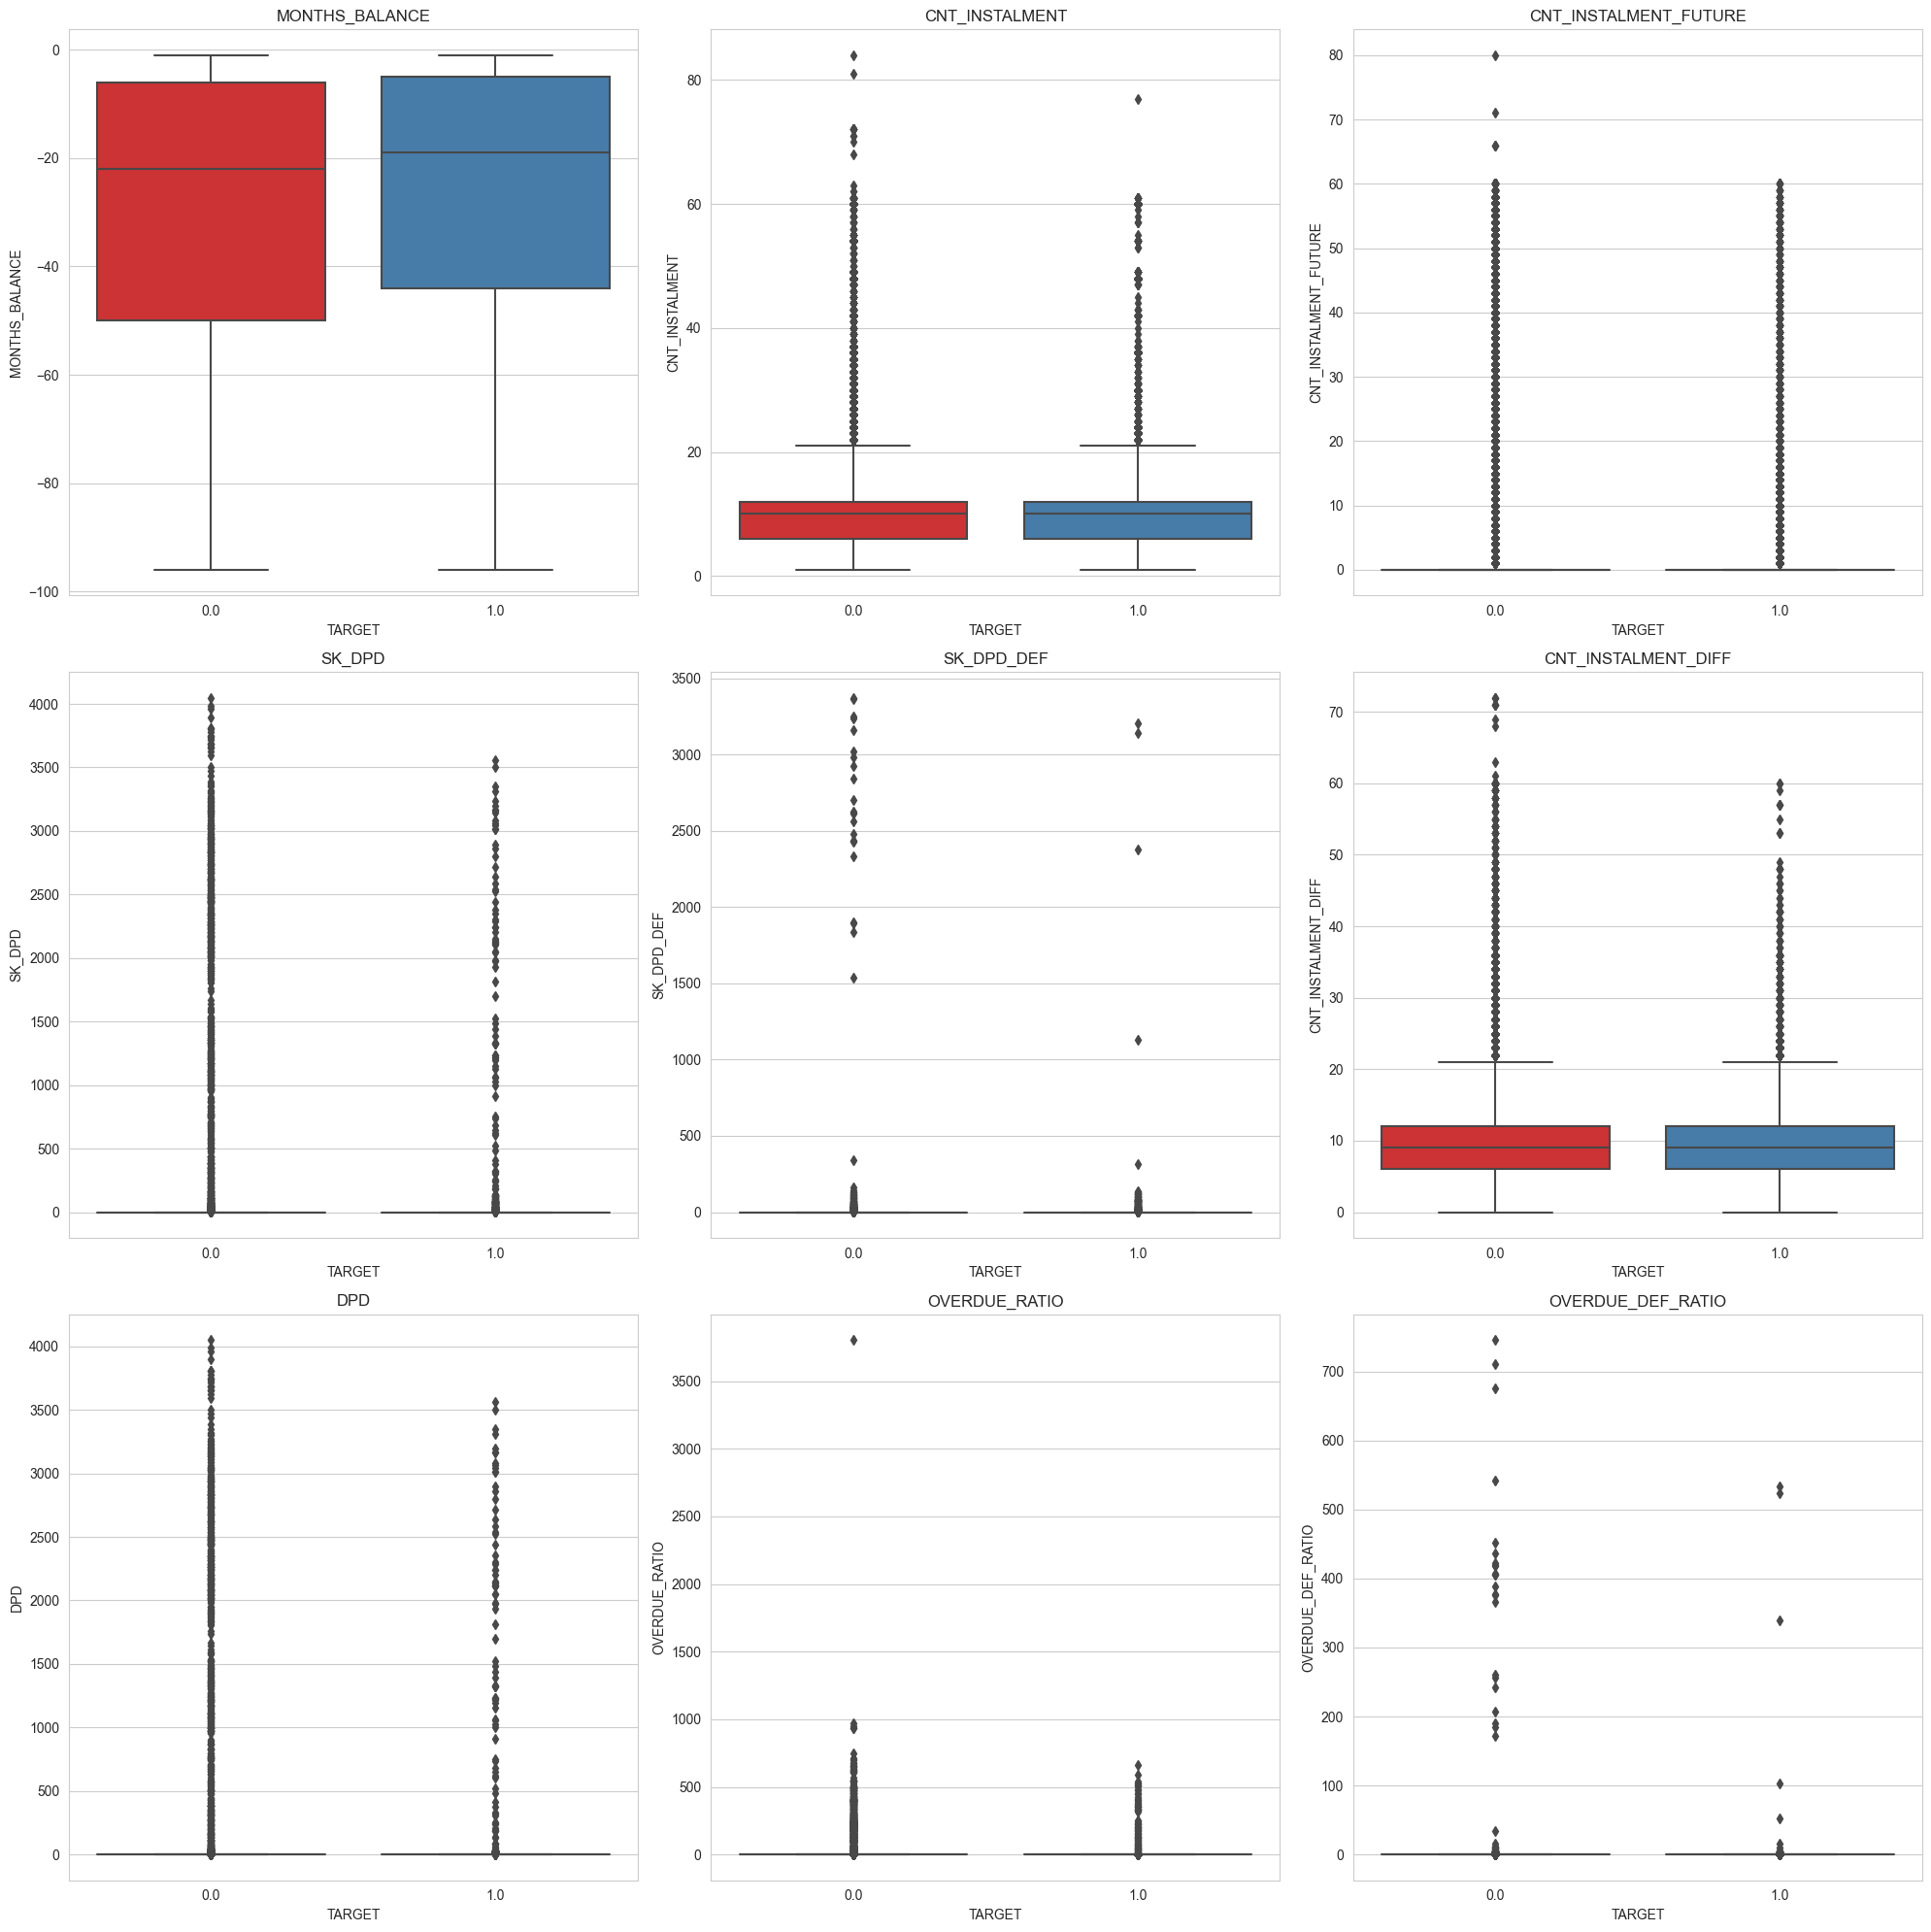

In [28]:
# Boxplot for numerical columns with hue = TARGET
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 20))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='TARGET', y=col, data=df_last, ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)

plt.tight_layout()
plt.show()

- MONTHS_BALANCE: Khách hàng target = 1 có xu hướng thực hiện nhiều nhkhoanr vay cho PÓ và Cash trong vòng 1 tháng trước khi đăng kí vay ở Home Credit hiện tại hơn là khách hàng target = 0.
- CNT_INSTALLMENT và CNT_FUTURE_INSTALLMENT của khách hàng target = 0 có thể đang lớn hơn khách hàng target = 1 ở 1 vài bản ghi nhưng tình trạng này có thể bắt nguồn từ nguyên nhân sự chênh lệch giữa class 0 và class 1 đang rất là lớn, gây mất cân bằng dữ liệu, dẫn đến những sai lệch trong kết quả.
- SK_DPD_DEF: thời hạn quá hạn trả tiền được ông ti cho phép này của khách hàng target 0 lớn hơn so với khách hàng target = 1.

In [30]:
# Process outliers by clipping
df_last[cols_to_plot] = df_last[cols_to_plot].clip(lower=df_last[cols_to_plot].quantile(0.01), upper=df_last[cols_to_plot].quantile(0.99), axis=1)
df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.0,12.0,Active,0,0,1.0,0,0.0,0.0,3,0,0,0,0.0
1,0,1716062,-5,2.0,0.0,Completed,0,0,2.0,0,0.0,0.0,3,0,0,0,0.0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3.0,0,0.0,0.0,3,0,0,0,0.0
3,0,2665996,-10,5.0,0.0,Completed,0,0,5.0,0,0.0,0.0,3,0,0,0,0.0
4,1,1847729,-43,10.0,0.0,Completed,0,0,10.0,0,0.0,0.0,2,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800328,307506,2196293,-2,12.0,0.0,Completed,0,0,12.0,0,0.0,0.0,4,0,0,0,0.0
800329,307506,2693485,-14,12.0,0.0,Completed,0,0,12.0,0,0.0,0.0,4,0,0,0,0.0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,8.0,0,0.0,0.0,2,0,0,0,0.0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,6.0,0,0.0,0.0,2,0,0,0,0.0


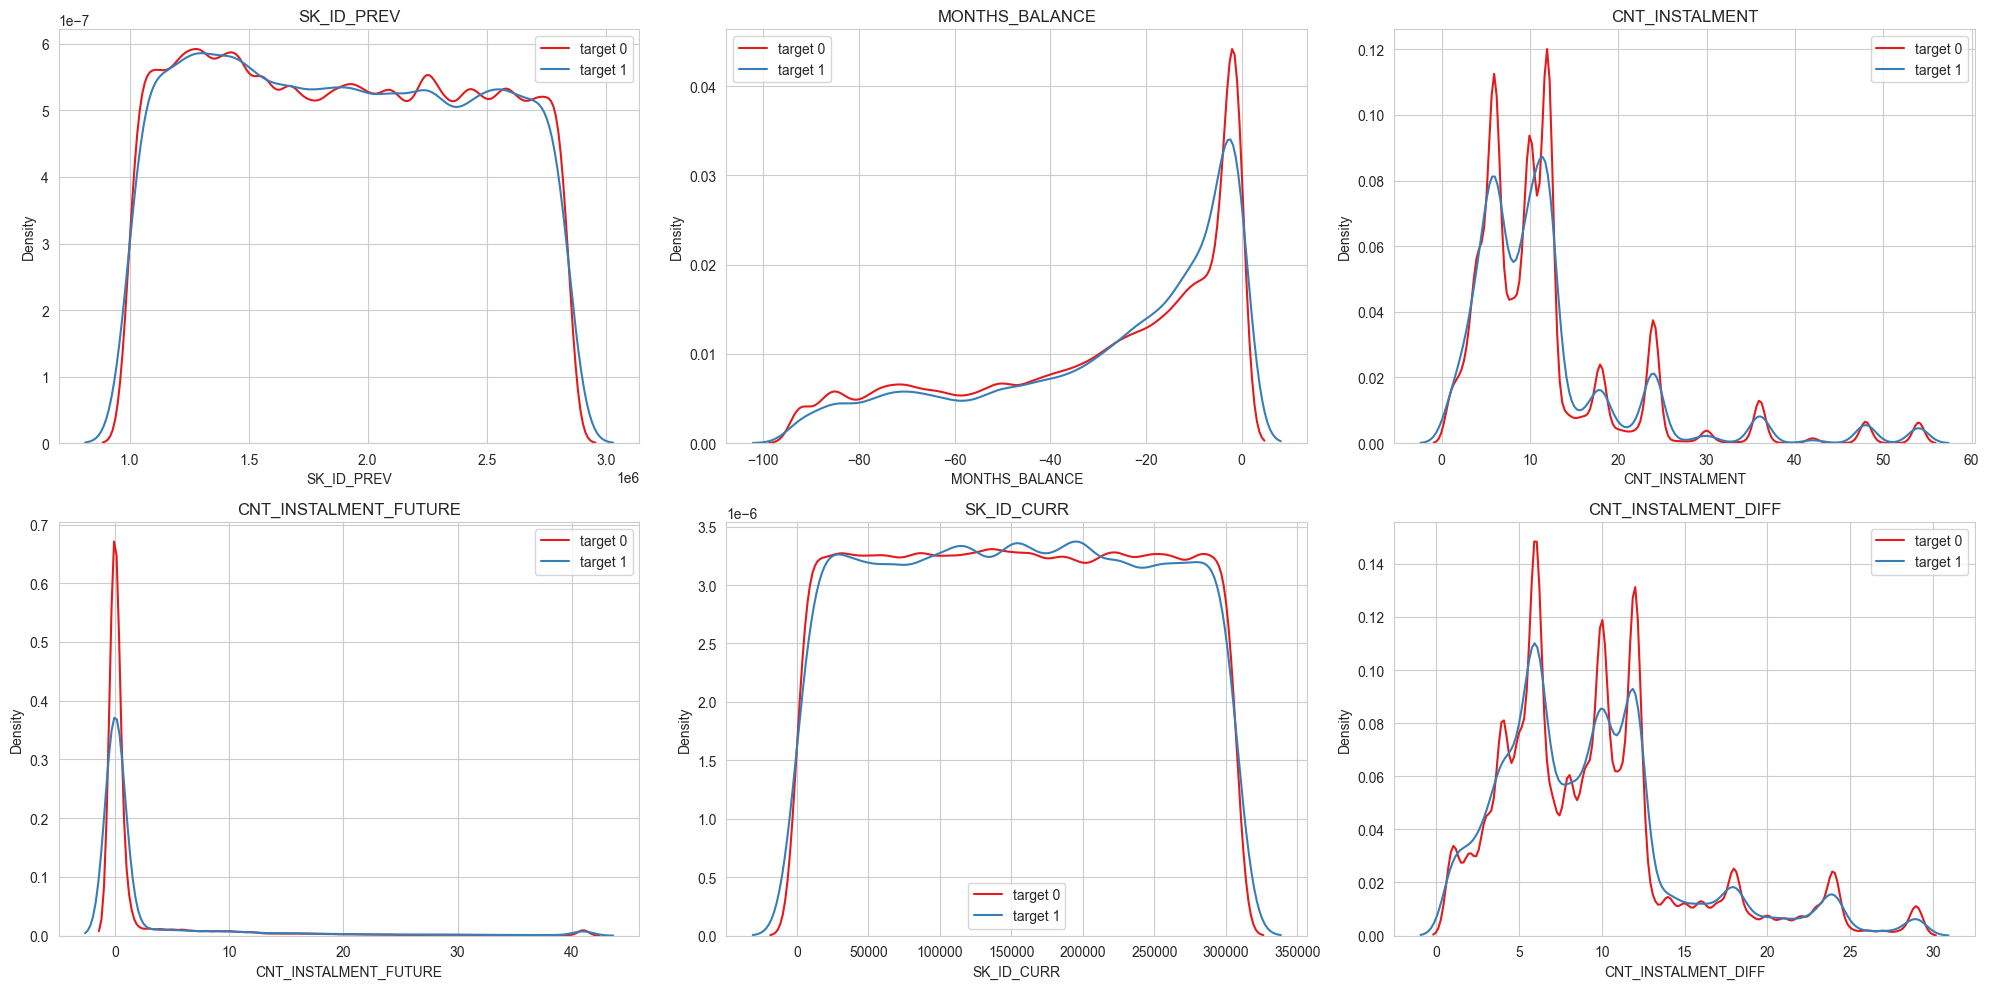

In [34]:
# Plot the distribution of the numerical features with hue = target
cols_to_plot = df_last[num_cols].var()[df_last[num_cols].var() > 0.1].index.tolist()
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(df_last.loc[df_last['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol])
    sns.kdeplot(df_last.loc[df_last['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

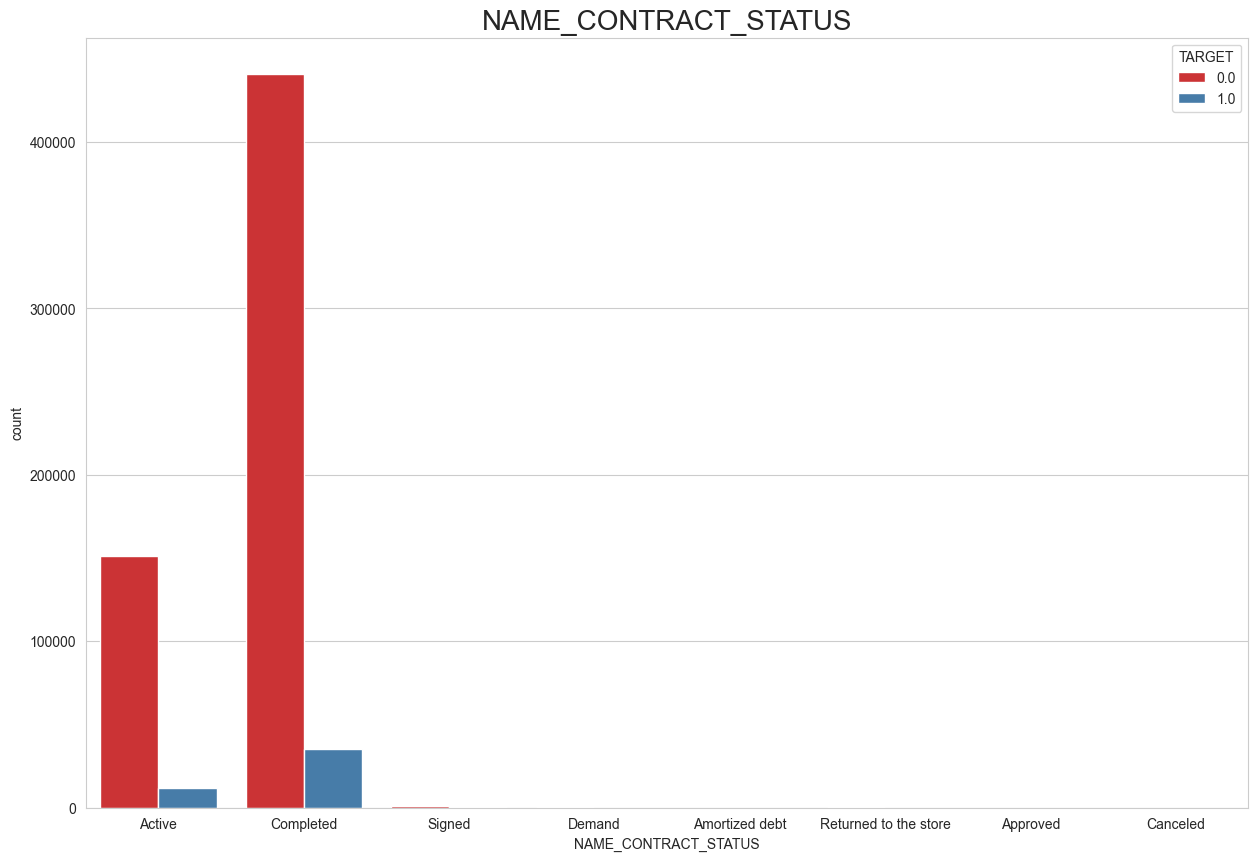

In [35]:
# Plot the distribution of the categorical features with hue = target
plt.figure(figsize=(15,10))
sns.countplot(x = df_last['NAME_CONTRACT_STATUS'], hue=df_last['TARGET'])
plt.title('NAME_CONTRACT_STATUS', fontsize=20)
plt.show()

- Tình trạng hợp đồng chủ yếu ở cả 2 tệp khách hàng đều là completed(hoàn thành), theo sau đó là active(vẫn đang trong thời gian trả nợ).

In [37]:
df_final = df_last.groupby('SK_ID_CURR').first()[["COMPLETED_COUNT","Overdue_Count",'DPD_FLAG_count','DPD_DEF_FLAG_count']]
df_final

,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
SK_ID_CURR,,,,
0,3,0,0,0
1,2,0,0,0
2,3,0,0,0
3,3,0,0,0
4,0,0,0,0
...,...,...,...,...
307504,2,0,0,0
307505,2,0,0,0
307506,4,0,0,0


In [38]:
agg_pos_df = df.groupby('SK_ID_CURR')[['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF','DPD','OVERDUE_RATIO','OVERDUE_DEF_RATIO']].agg(['min','max','mean','std'])
agg_pos_df

MONTHS_BALANCE                           CNT_INSTALMENT        \
                      min max       mean        std            min   max   
SK_ID_CURR                                                                 
0                     -15  -1  -7.466667   4.808722            2.0  12.0   
1                     -53 -12 -32.086957  15.942833           10.0  36.0   
2                     -82 -23 -55.147059  21.817608            4.0  12.0   
3                     -24  -5 -12.428571   6.272213            2.0  12.0   
4                     -79 -73 -76.000000   2.160247            6.0   6.0   
...                   ...  ..        ...        ...            ...   ...   
307505                -68 -40 -54.450000  10.148762            8.0  10.0   
307506                -82  -2 -27.744681  24.328788            6.0  12.0   
307508                -75  -1 -29.065217  25.707243           10.0  12.0   
307509                -51 -25 -38.687500  10.031409            6.0  12.0   
307510                -82 -72 -77.000000   3.316625           10.0  10.0   

                                 CNT_INSTALMENT_FUTURE        ...      DPD  \
                 mean        std                   min   max  ...     mean   
SK_ID_CURR                                                    ...            
0            8.133333   3.758166                   0.0  12.0  ...  0.00000   
1           22.478261  13.238613                   0.0  36.0  ...  1.26087   
2            8.588235   3.016296                   0.0  12.0  ...  0.00000   
3            9.928571   3.518397                   0.0  12.0  ...  0.00000   
4            6.000000   0.000000                   0.0   6.0  ...  0.00000   
...               ...        ...                   ...   ...  ...      ...   
307505       9.100000   1.020836                   0.0  10.0  ...  0.00000   
307506      10.978723   2.279296                   0.0  12.0  ...  0.00000   
307508      11.111111   1.005038                   0.0  12.0  ...  0.00000   
307509       9.125000   3.008322                   0.0  12.0  ...  0.00000   
307510      10.000000   0.000000                   0.0  10.0  ...  0.00000   

                     OVERDUE_RATIO                                \
                 std           min       max      mean       std   
SK_ID_CURR                                                         
0           0.000000           0.0  0.000000  0.000000  0.000000   
1           4.180228           0.0  0.416667  0.035024  0.116117   
2           0.000000           0.0  0.000000  0.000000  0.000000   
3           0.000000           0.0  0.000000  0.000000  0.000000   
4           0.000000           0.0  0.000000  0.000000  0.000000   
...              ...           ...       ...       ...       ...   
307505      0.000000           0.0  0.000000  0.000000  0.000000   
307506      0.000000           0.0  1.666667  0.134752  0.447265   
307508      0.000000           0.0  0.000000  0.000000  0.000000   
307509      0.000000           0.0  0.000000  0.000000  0.000000   
307510      0.000000           0.0  0.000000  0.000000  0.000000   

           OVERDUE_DEF_RATIO                                
                         min       max      mean       std  
SK_ID_CURR                                                  
0                        0.0  0.000000  0.000000  0.000000  
1                        0.0  0.000000  0.000000  0.000000  
2                        0.0  0.000000  0.000000  0.000000  
3                        0.0  0.000000  0.000000  0.000000  
4                        0.0  0.000000  0.000000  0.000000  
...                      ...       ...       ...       ...  
307505                   0.0  0.000000  0.000000  0.000000  
307506                   0.0  1.666667  0.134752  0.447265  
307508                   0.0  0.000000  0.000000  0.000000  
307509                   0.0  0.000000  0.000000  0.000000  
307510                   0.0  0.000000  0.000000  0.000000  

[289444 rows x 32 columns]

In [39]:
agg_pos_df.columns = [c[0] + "_" + c[1].upper() for c in agg_pos_df.columns.values.tolist()]
agg_pos_df

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,CNT_INSTALMENT_MAX,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_STD,CNT_INSTALMENT_FUTURE_MIN,CNT_INSTALMENT_FUTURE_MAX,...,DPD_MEAN,DPD_STD,OVERDUE_RATIO_MIN,OVERDUE_RATIO_MAX,OVERDUE_RATIO_MEAN,OVERDUE_RATIO_STD,OVERDUE_DEF_RATIO_MIN,OVERDUE_DEF_RATIO_MAX,OVERDUE_DEF_RATIO_MEAN,OVERDUE_DEF_RATIO_STD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
0,-15,-1,-7.466667,4.808722,2.0,12.0,8.133333,3.758166,0.0,12.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,-53,-12,-32.086957,15.942833,10.0,36.0,22.478261,13.238613,0.0,36.0,...,1.26087,4.180228,0.0,0.416667,0.035024,0.116117,0.0,0.000000,0.000000,0.000000
2,-82,-23,-55.147059,21.817608,4.0,12.0,8.588235,3.016296,0.0,12.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,-24,-5,-12.428571,6.272213,2.0,12.0,9.928571,3.518397,0.0,12.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,-79,-73,-76.000000,2.160247,6.0,6.0,6.000000,0.000000,0.0,6.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,-68,-40,-54.450000,10.148762,8.0,10.0,9.100000,1.020836,0.0,10.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
307506,-82,-2,-27.744681,24.328788,6.0,12.0,10.978723,2.279296,0.0,12.0,...,0.00000,0.000000,0.0,1.666667,0.134752,0.447265,0.0,1.666667,0.134752,0.447265
307508,-75,-1,-29.065217,25.707243,10.0,12.0,11.111111,1.005038,0.0,12.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [40]:
agg_pos_df.fillna(0,inplace=True)
agg_pos_df.reset_index(inplace=True)

In [41]:
df_final = df_final.merge(agg_pos_df, how= "left", on= "SK_ID_CURR")
df_final

,SK_ID_CURR,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,...,DPD_MEAN,DPD_STD,OVERDUE_RATIO_MIN,OVERDUE_RATIO_MAX,OVERDUE_RATIO_MEAN,OVERDUE_RATIO_STD,OVERDUE_DEF_RATIO_MIN,OVERDUE_DEF_RATIO_MAX,OVERDUE_DEF_RATIO_MEAN,OVERDUE_DEF_RATIO_STD
0,0,3,0,0,0,-15,-1,-7.466667,4.808722,2.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1,2,0,0,0,-53,-12,-32.086957,15.942833,10.0,...,1.26087,4.180228,0.0,0.416667,0.035024,0.116117,0.0,0.000000,0.000000,0.000000
2,2,3,0,0,0,-82,-23,-55.147059,21.817608,4.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,3,3,0,0,0,-24,-5,-12.428571,6.272213,2.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,4,0,0,0,0,-79,-73,-76.000000,2.160247,6.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231526,307504,2,0,0,0,-96,-1,-59.615385,39.963605,6.0,...,0.00000,0.000000,0.0,4.666667,0.358974,1.294300,0.0,4.666667,0.358974,1.294300
231527,307505,2,0,0,0,-68,-40,-54.450000,10.148762,8.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
231528,307506,4,0,0,0,-82,-2,-27.744681,24.328788,6.0,...,0.00000,0.000000,0.0,1.666667,0.134752,0.447265,0.0,1.666667,0.134752,0.447265
231529,307509,2,0,0,0,-51,-25,-38.687500,10.031409,6.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
